In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
import seaborn as sns

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep= ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

In [4]:
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [5]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [25]:
df.duplicated().sum()

np.int64(12)

In [26]:
bool_dup_rows = list(df.duplicated())
dup_rows = []

for i, row in enumerate(bool_dup_rows):
    if row == True:
        dup_rows.append(i)
print(dup_rows)

[1266, 12261, 14234, 16956, 18465, 20216, 20534, 25217, 28477, 32516, 36951, 38281]


In [27]:
df.drop(index= dup_rows, inplace=True)

In [28]:
df.duplicated().sum()

np.int64(0)

#### Eliminación de variables innecesarias

In [29]:
df.drop(columns= ['day_of_week', 'month','duration'], inplace=True)

### **Porqué elimino estas variables?**

1. day_of_week: El día específico de la semana en que se contacta a un cliente probablemente tenga un impacto muy limitado o nulo en la decisión de contratar un depósito a largo plazo.
2. month: Creo que la relación entre el mes específico y la decisión del cliente podría no ser lo suficientemente fuerte.
3. duration: creo que la variable duración podría conllevar sesgo al modelo ya qué la duración de la llamada solo se sabrá una vez contactado con el cliente y no antes.

## Visulaización de variables categóricas


In [30]:
# Filtro solo las columnas de tipo 'object'
df_object = df.select_dtypes(include=['object'])

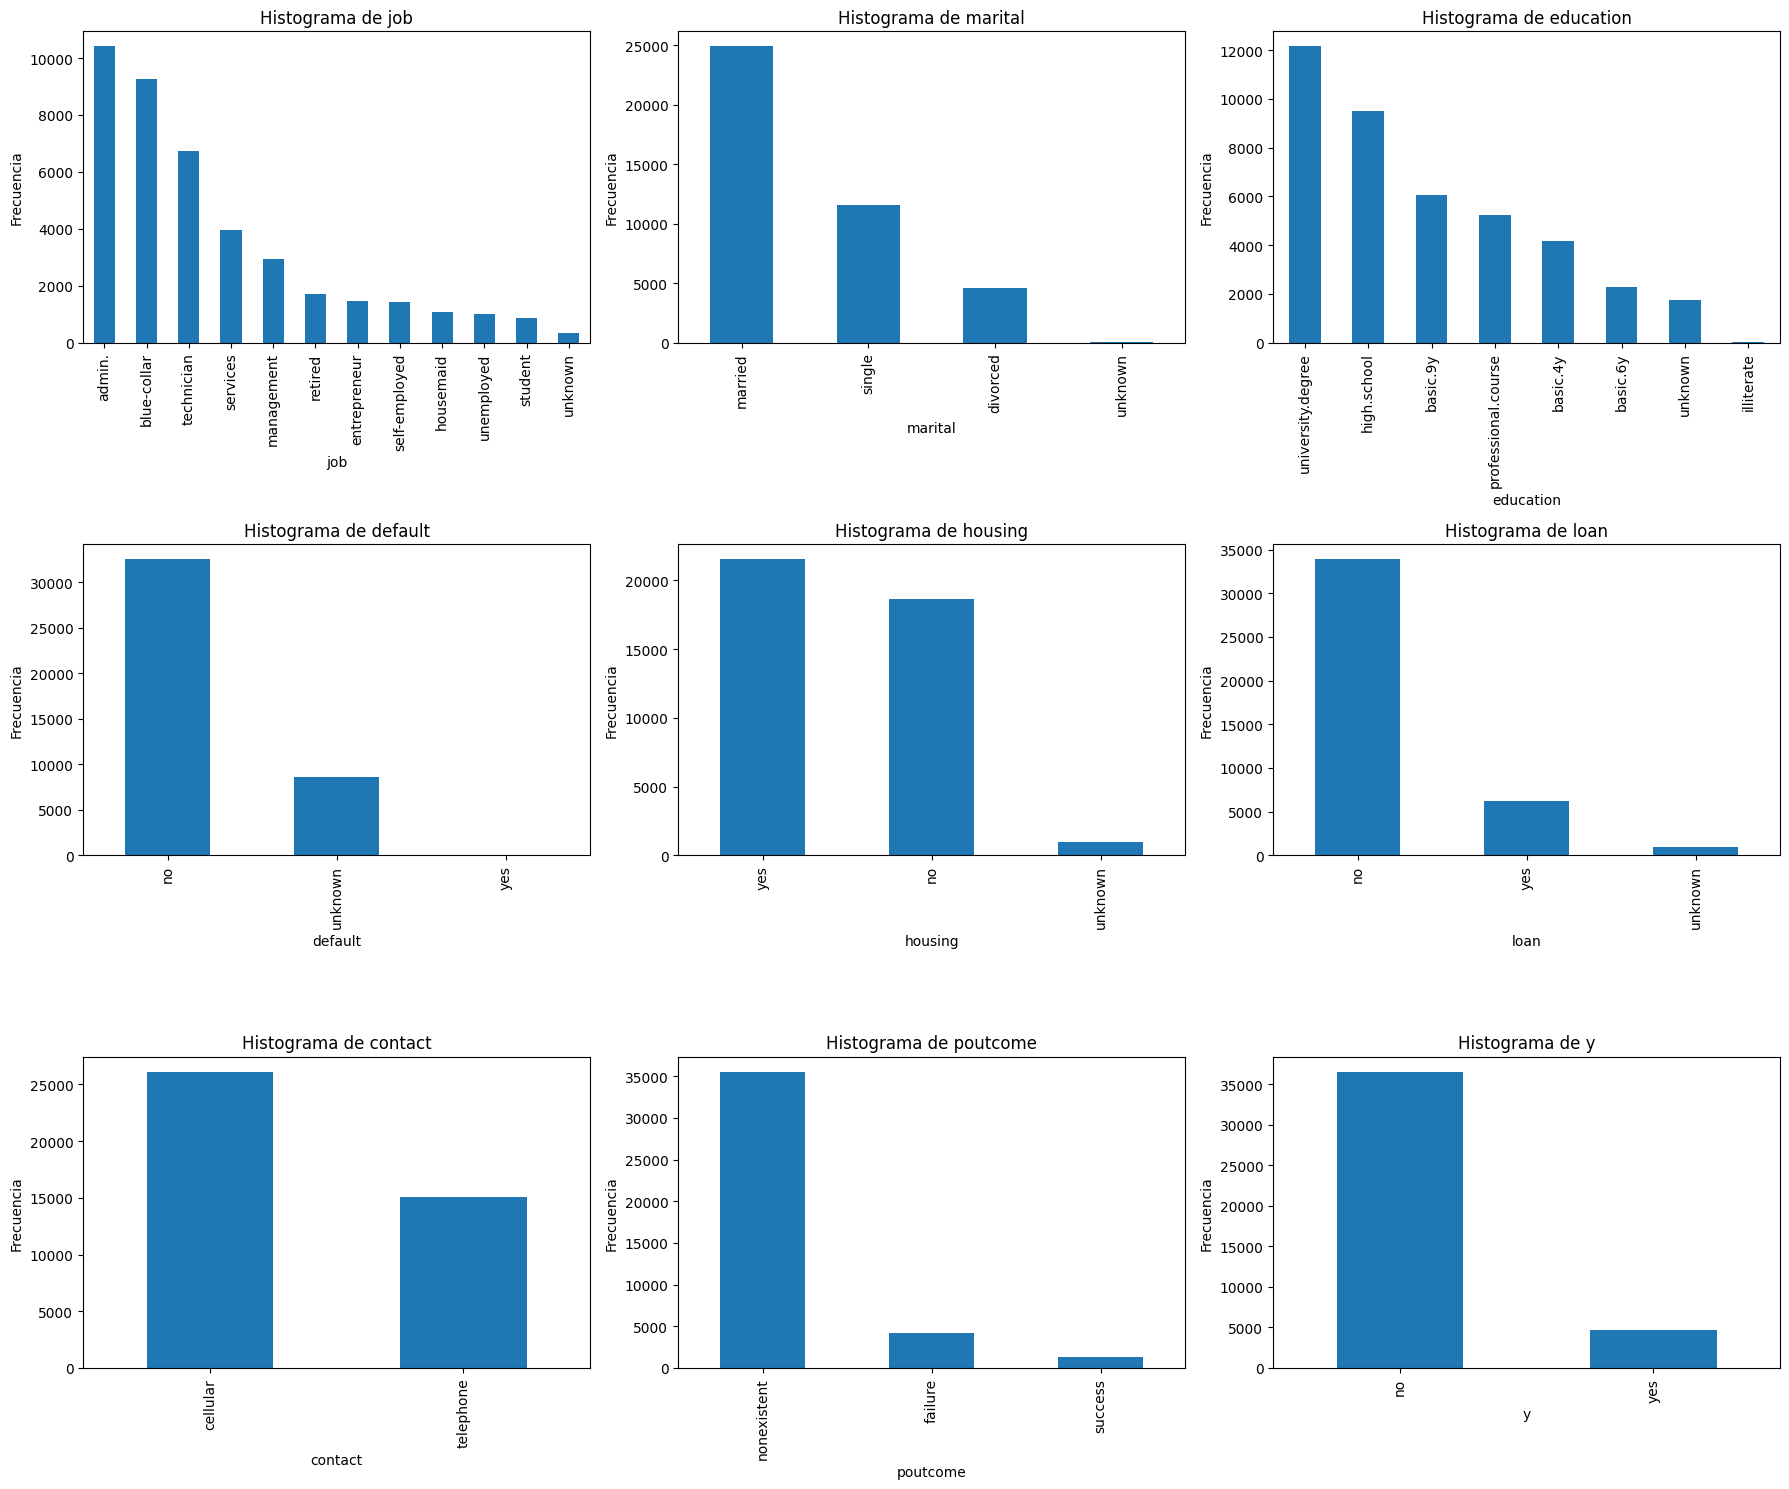

In [13]:
import matplotlib.pyplot as plt
import math

# Determinar el número de columnas en df_object
num_columns = len(df_object.columns)

# Determinar el número de filas y columnas en los subplots
rows = math.ceil(num_columns / 3)  # Por ejemplo, 3 columnas por fila

# Crear la figura y los subplots
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 5))  # Ajustar el tamaño de la figura según sea necesario
axes = axes.flatten()  # Convertir la matriz de ejes en una lista para iterar fácilmente

# Crear un histograma para cada columna de tipo 'object'
for i, column in enumerate(df_object.columns):
    df_object[column].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Histograma de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=90)

# Eliminar subplots vacíos si es que existen
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout()
plt.show()


In [14]:
df_num = df.select_dtypes(include=['int64', 'float64'])

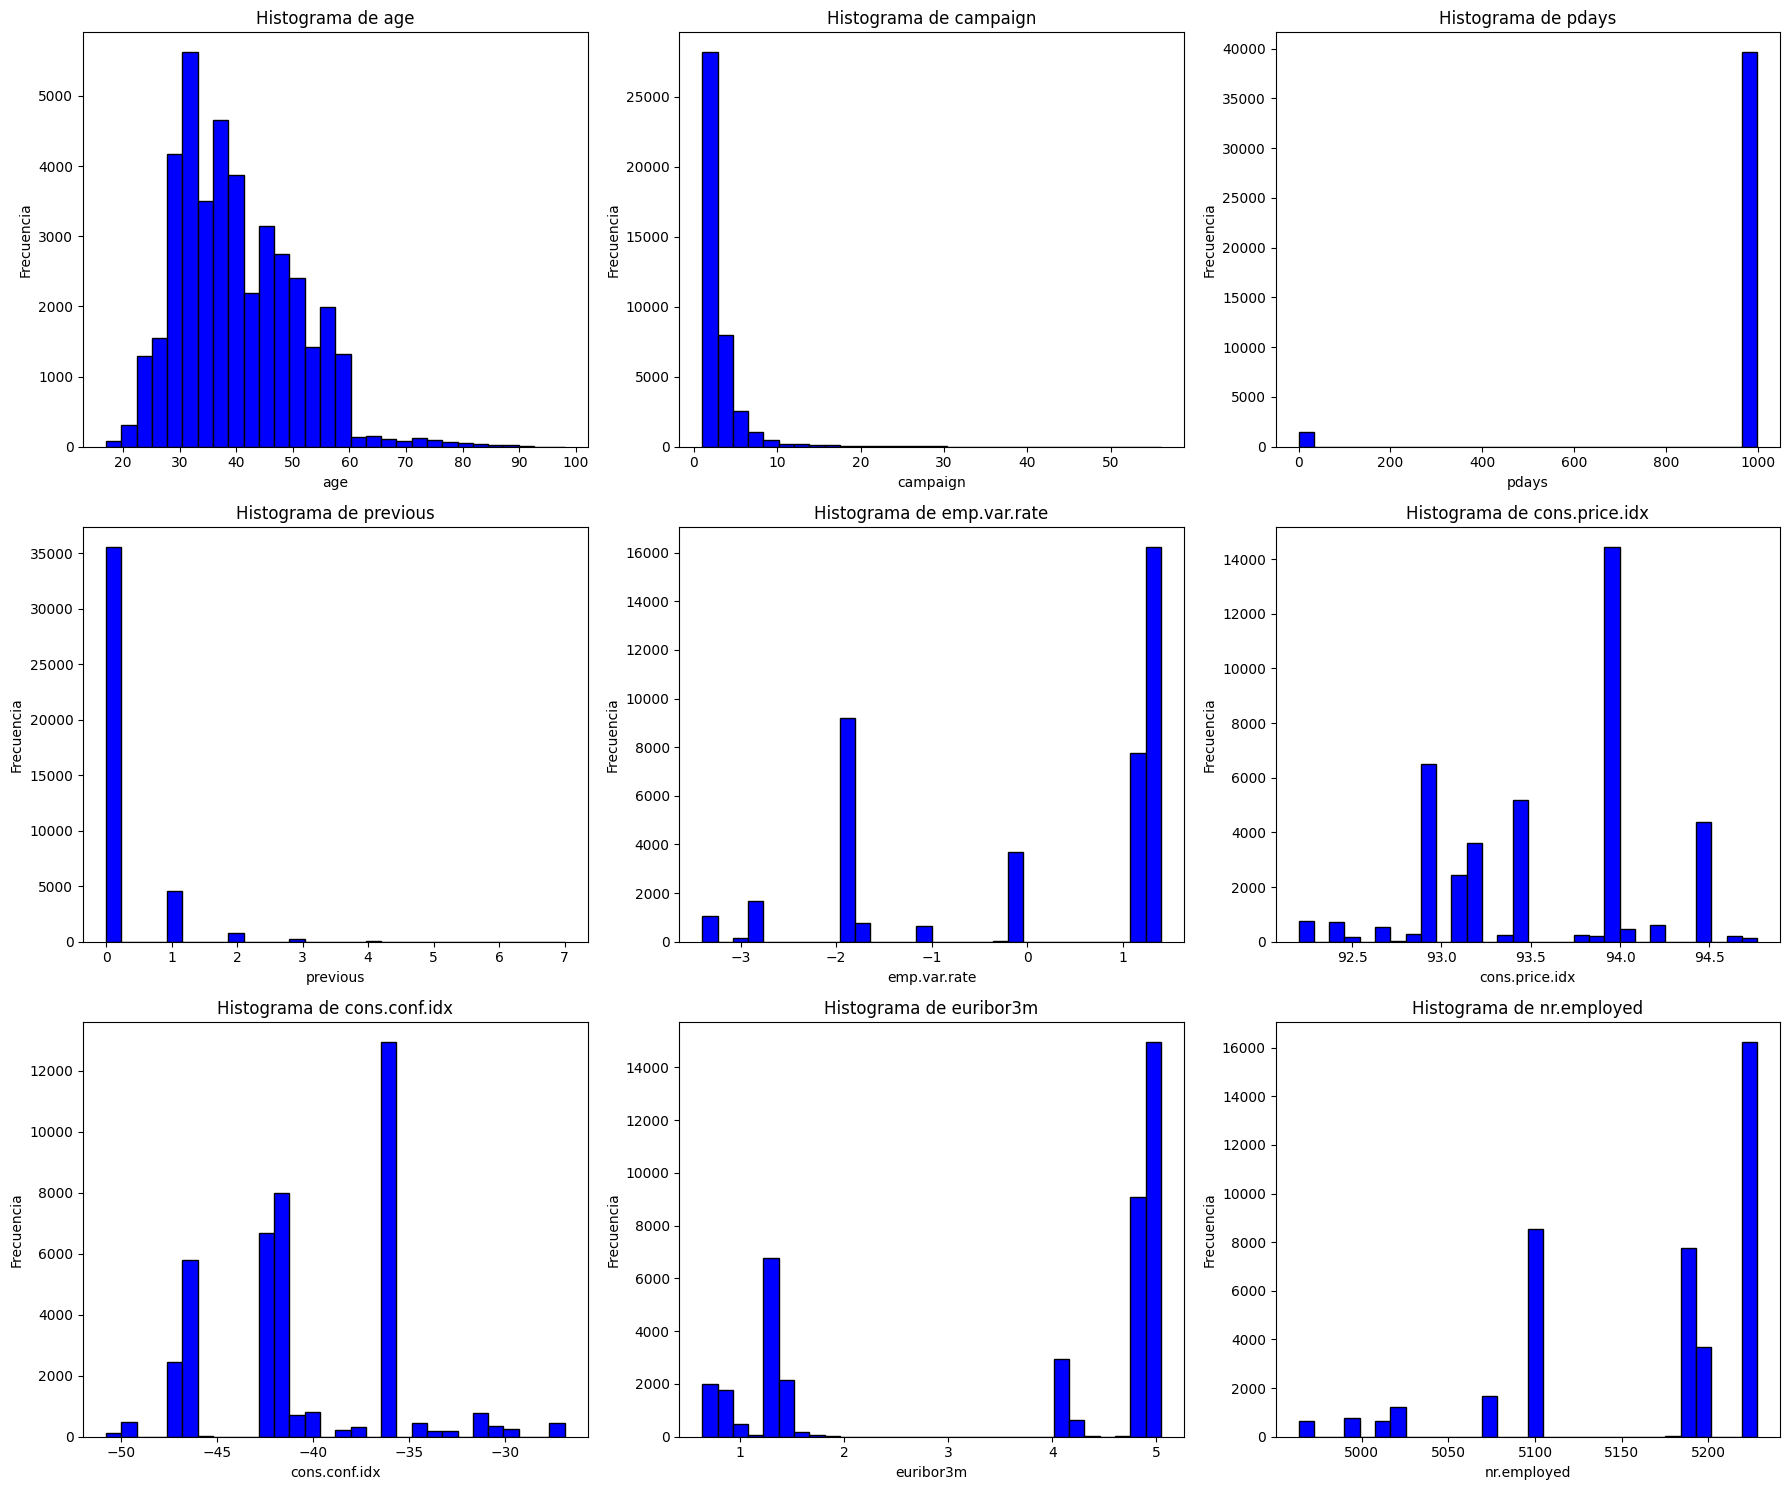

In [32]:
import matplotlib.pyplot as plt
import math

# Determinar el número de columnas en df_numeric
num_columns = len(df_num.columns)

# Determinar el número de filas y columnas en los subplots
rows = math.ceil(num_columns / 3) 

# Crear la figura y los subplots
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 5))  # Ajustar el tamaño de la figura según sea necesario
axes = axes.flatten()  # Convertir la matriz de ejes en una lista para iterar fácilmente

# Crear un histograma para cada columna numérica
for i, column in enumerate(df_num.columns):
    df_num[column].plot(kind='hist', bins=30, ax=axes[i], color='blue', edgecolor='black')
    axes[i].set_title(f'Histograma de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(False)

# Eliminar subplots vacíos si es que existen
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


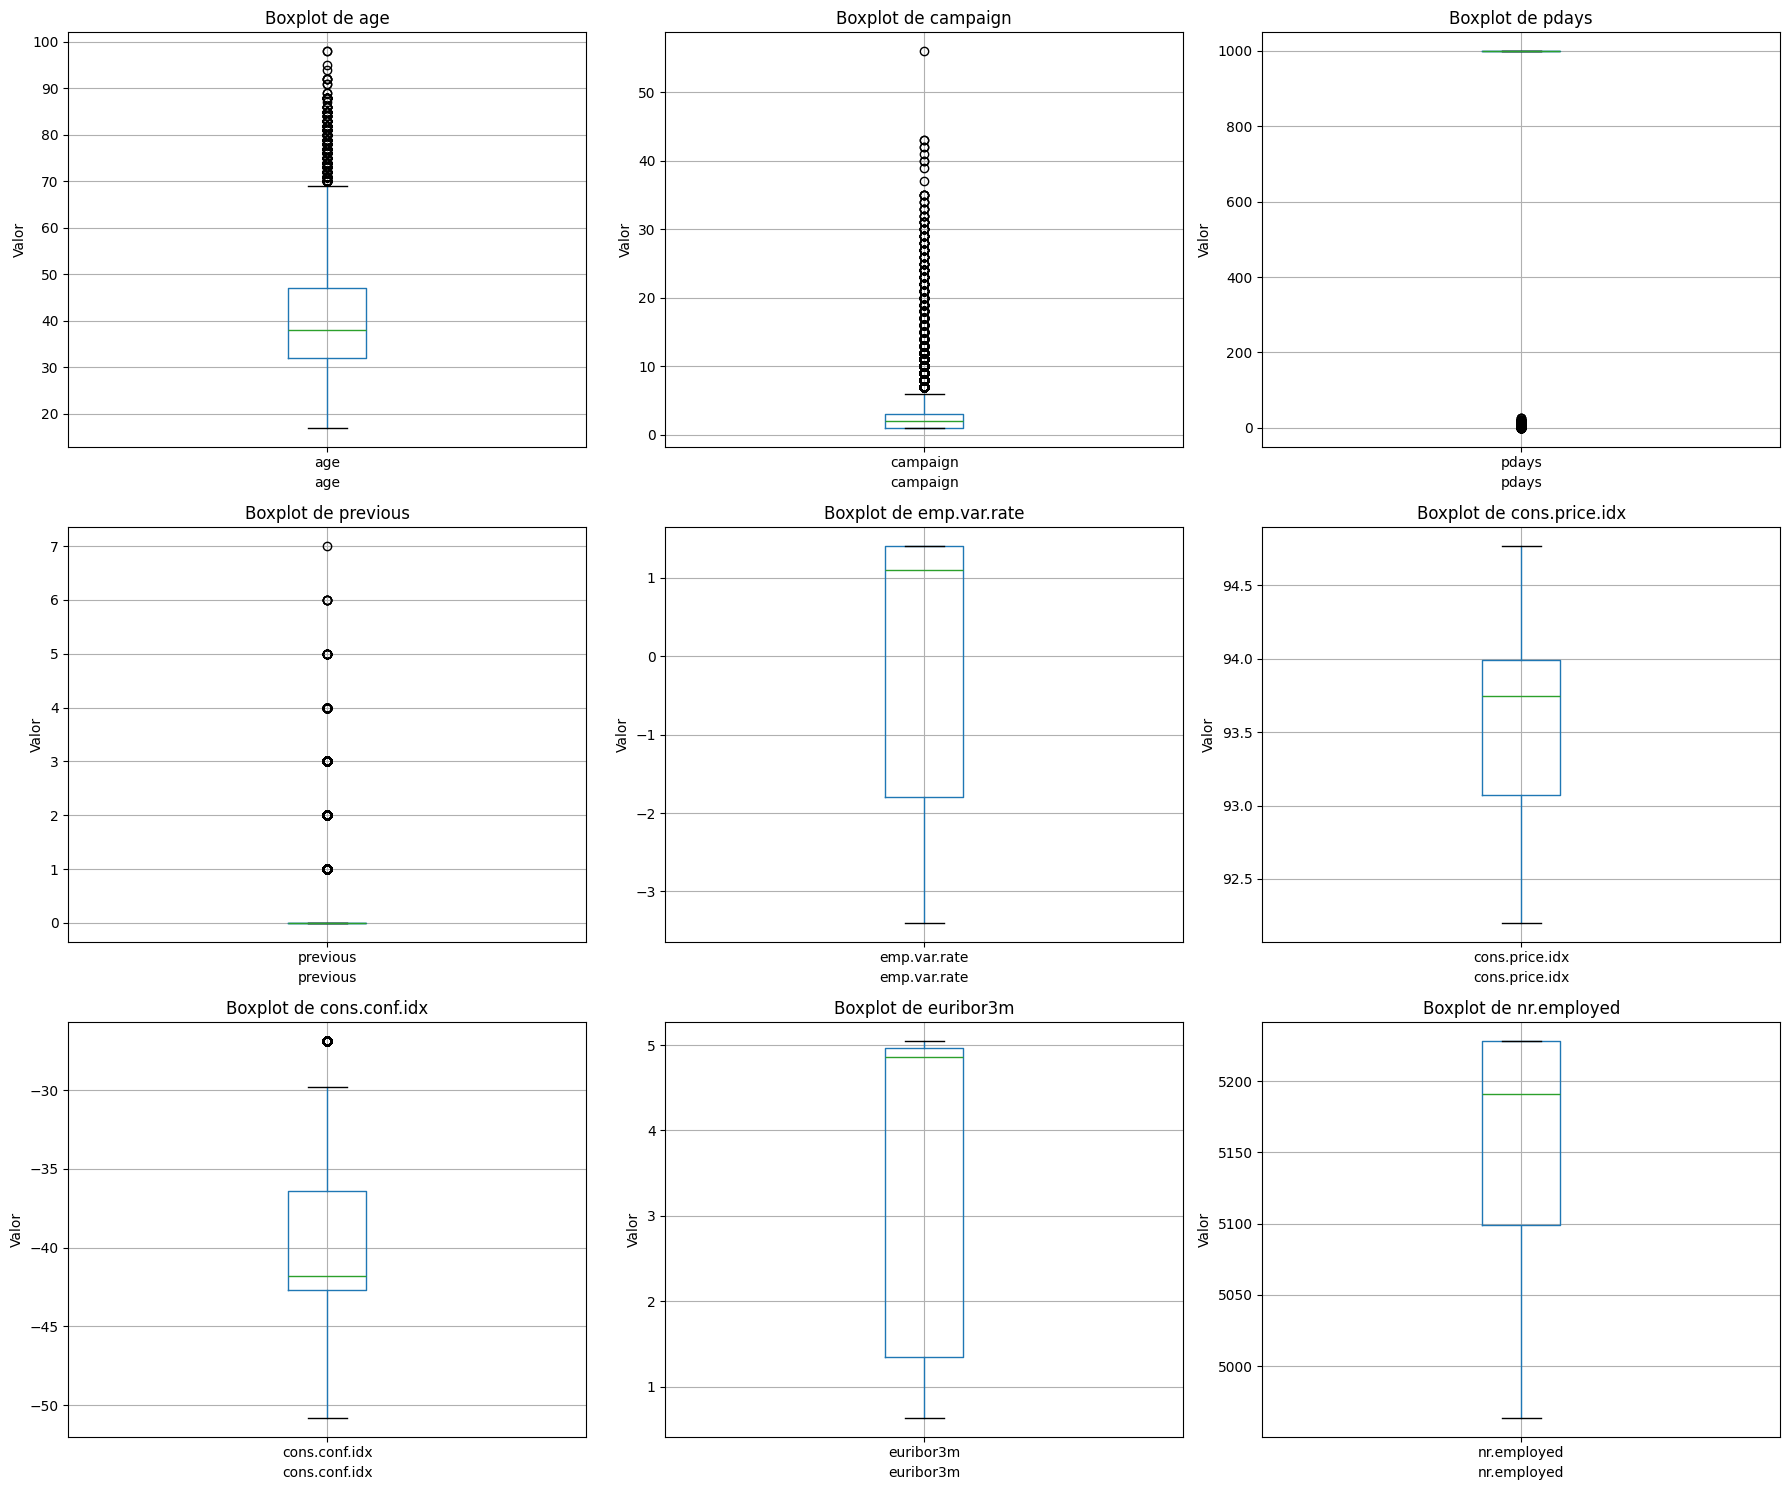

In [34]:
import matplotlib.pyplot as plt
import math

# Determinar el número de columnas en df_numeric
num_columns = len(df_num.columns)

# Determinar el número de filas y columnas en los subplots
rows = math.ceil(num_columns / 3)  # Por ejemplo, 3 columnas por fila

# Crear la figura y los subplots
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 5))  # Ajustar el tamaño de la figura según sea necesario
axes = axes.flatten()  # Convertir la matriz de ejes en una lista para iterar fácilmente

# Crear un boxplot para cada columna numérica
for i, column in enumerate(df_num.columns):
    df_num.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f'Boxplot de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Valor')
    axes[i].grid(True)

# Eliminar subplots vacíos si es que existen
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout()
plt.show()


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


In [16]:
df.skew(numeric_only=True)

age               0.784560
campaign          4.762044
pdays            -4.921386
previous          3.831396
emp.var.rate     -0.724061
cons.price.idx   -0.230853
cons.conf.idx     0.302876
euribor3m        -0.709194
nr.employed      -1.044317
dtype: float64

In [12]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [13]:
frecuencia_pdays = df['pdays'].value_counts()
frecuencia_pdays

pdays
999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [67]:
frecuencia_previous = df['previous'].value_counts()
frecuencia_previous

previous
0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

In [68]:
frecuencia_campaign = df['campaign'].value_counts()
frecuencia_campaign

campaign
1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
30        7
31        7
35        5
33        4
32        4
34        3
43        2
40        2
42        2
39        1
56        1
37        1
41        1
Name: count, dtype: int64

In [35]:
#Elimino la variable pdays, porque la mayoria de valores son 999
df.drop('pdays', axis= 1, inplace= True)

In [31]:
#Ajusto las variables campaign y previous

## Campaign
campaign_stats = df["campaign"].describe() 

campaign_iqr = campaign_stats ["75%"] - campaign_stats ["25%"]
upper_limit_ca = campaign_stats ["75%"] + 1.5 * campaign_iqr
lower_limit_ca = campaign_stats ["25%"] - 1.5 * campaign_iqr

## filtro los outliers de Campaign
df = df.loc[df['campaign'] < upper_limit_ca]


In [32]:
## previous
previous_stats = df["previous"].describe() 
previous_stats

count    37791.000000
mean         0.181842
std          0.506700
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [33]:
df.drop('previous', axis = 1, inplace= True)

In [36]:
df.skew(numeric_only= True)

age               0.799495
campaign          1.122823
emp.var.rate     -0.667924
cons.price.idx   -0.206999
cons.conf.idx     0.306240
euribor3m        -0.649879
nr.employed      -0.995738
dtype: float64

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['y_num'] = label_encoder.fit_transform(df['y'])
df.drop('y',axis = 1, inplace= True)

Variables numéricas

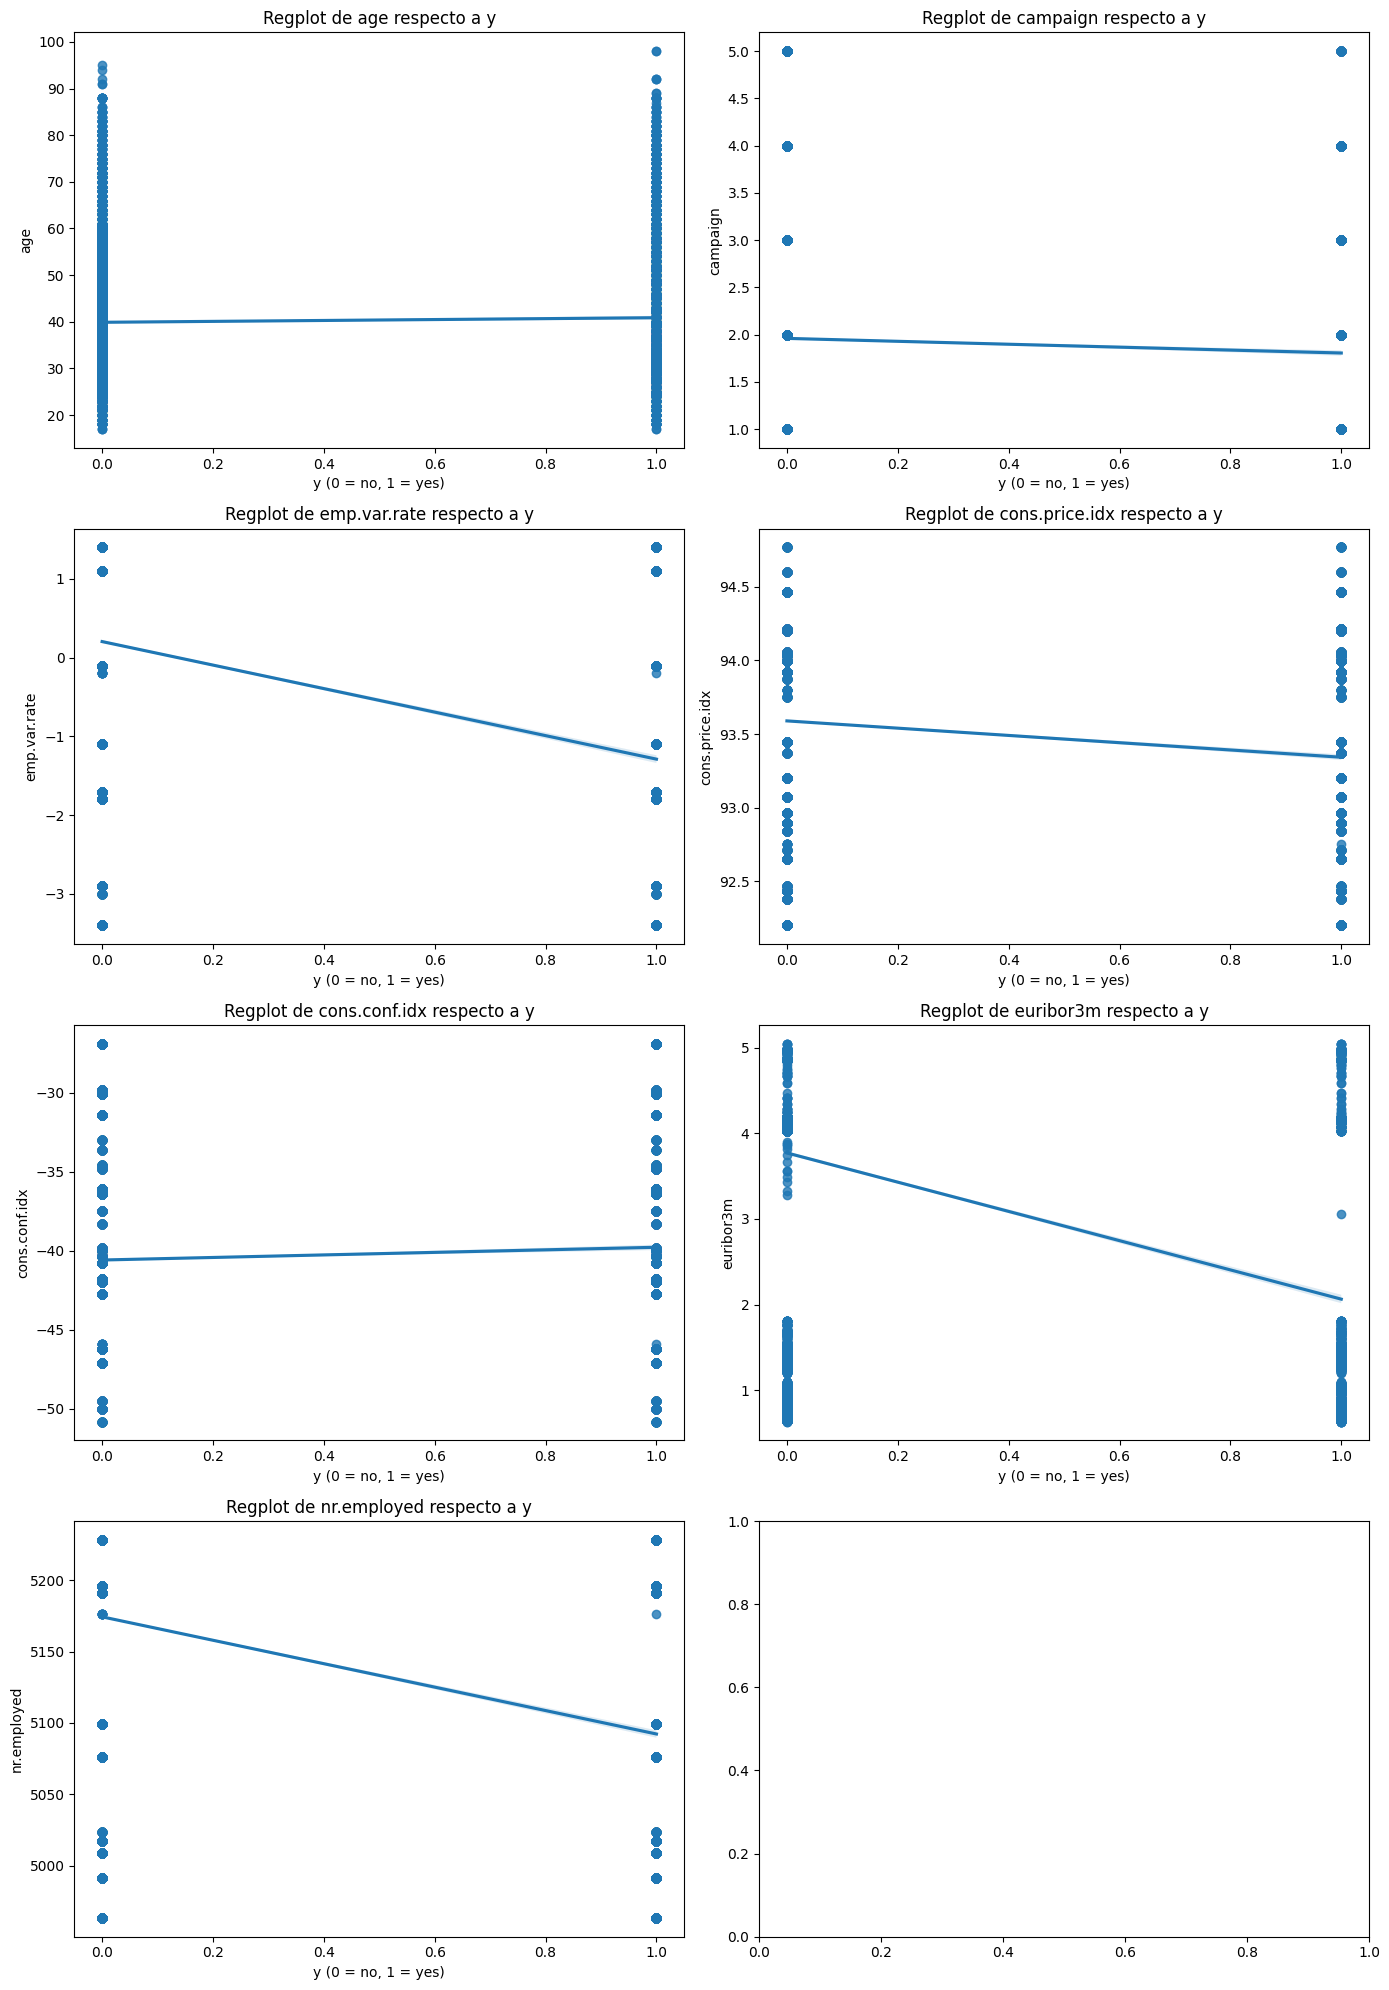

In [38]:
df_num = df.select_dtypes(include=['int64', 'float64'])
# Determinar el número de columnas en df_numeric
num_columns = len(df_num.columns) - 1  # Excluyendo 'y_num'

# Determinar el número de filas y columnas en los subplots
rows = math.ceil(num_columns / 2)  # Por ejemplo, 2 columnas por fila

# Crear la figura y los subplots
fig, axes = plt.subplots(rows, 2, figsize=(14, rows * 5))  # Ajustar el tamaño de la figura según sea necesario
axes = axes.flatten()  # Convertir la matriz de ejes en una lista para iterar fácilmente

# Crear un regplot para cada columna numérica respecto a 'y_numeric'
for i, column in enumerate(df_num.columns):
    if column != 'y_num':  # Evitar la variable objetivo convertida
        sns.regplot(x='y_num', y=column, data=df, ax=axes[i])
        axes[i].set_title(f'Regplot de {column} respecto a y')
        axes[i].set_xlabel('y (0 = no, 1 = yes)')
        axes[i].set_ylabel(column)

# Eliminar subplots vacíos si es que existen
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout()
plt.show()

In [39]:
df_num = df_num.assign(y_num = df['y_num'])

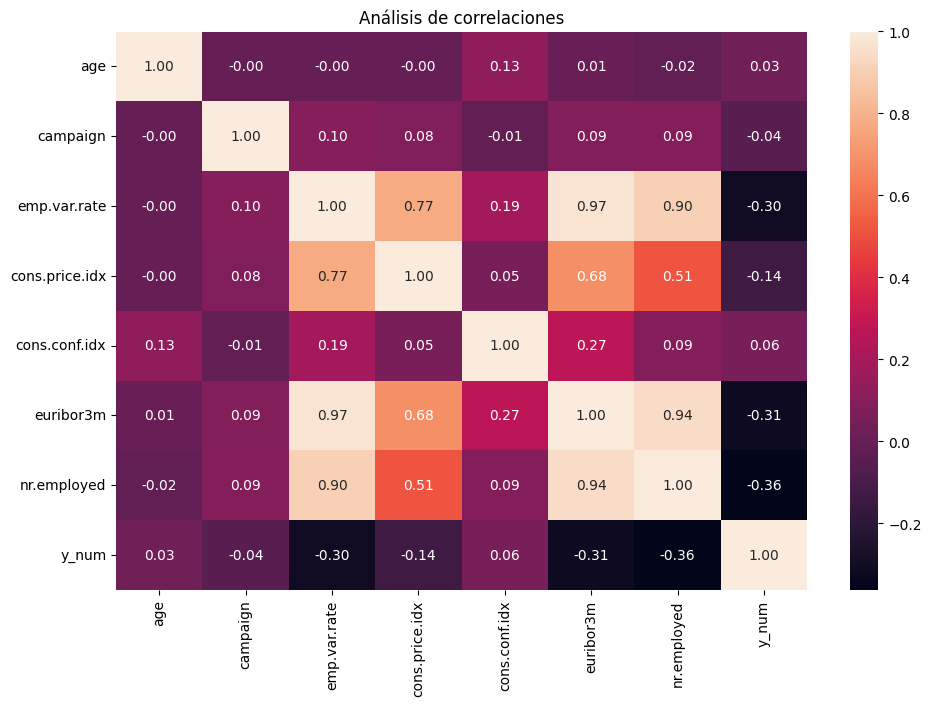

In [40]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(df_num.corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.title('Análisis de correlaciones')

plt.show()

In [41]:
df['abs_var'] = df['nr.employed']*df['emp.var.rate']

In [42]:
df.drop(columns = ['nr.employed'], inplace= True)

In [57]:
df.drop(columns = ['emp.var.rate'], inplace= True)

In [43]:
df.drop(columns = ['cons.price.idx'], inplace= True)

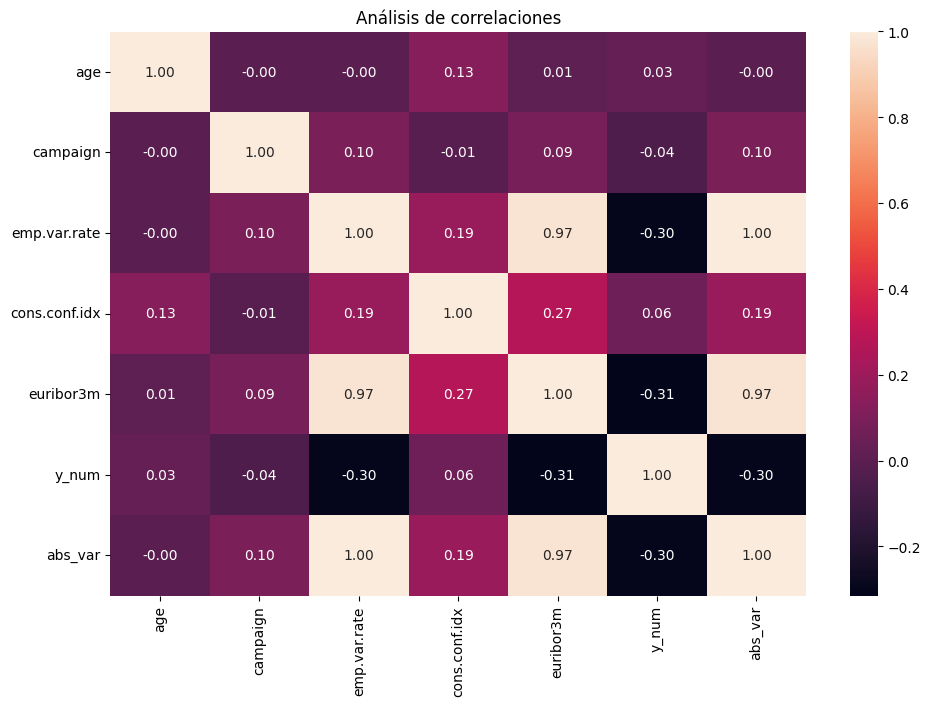

In [45]:
df_num = df.select_dtypes(include=['int64', 'float64'])
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(df_num.corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.title('Análisis de correlaciones')

plt.show()

In [46]:
df.drop('abs_var', axis= 1, inplace= True)

Variables Categóricas

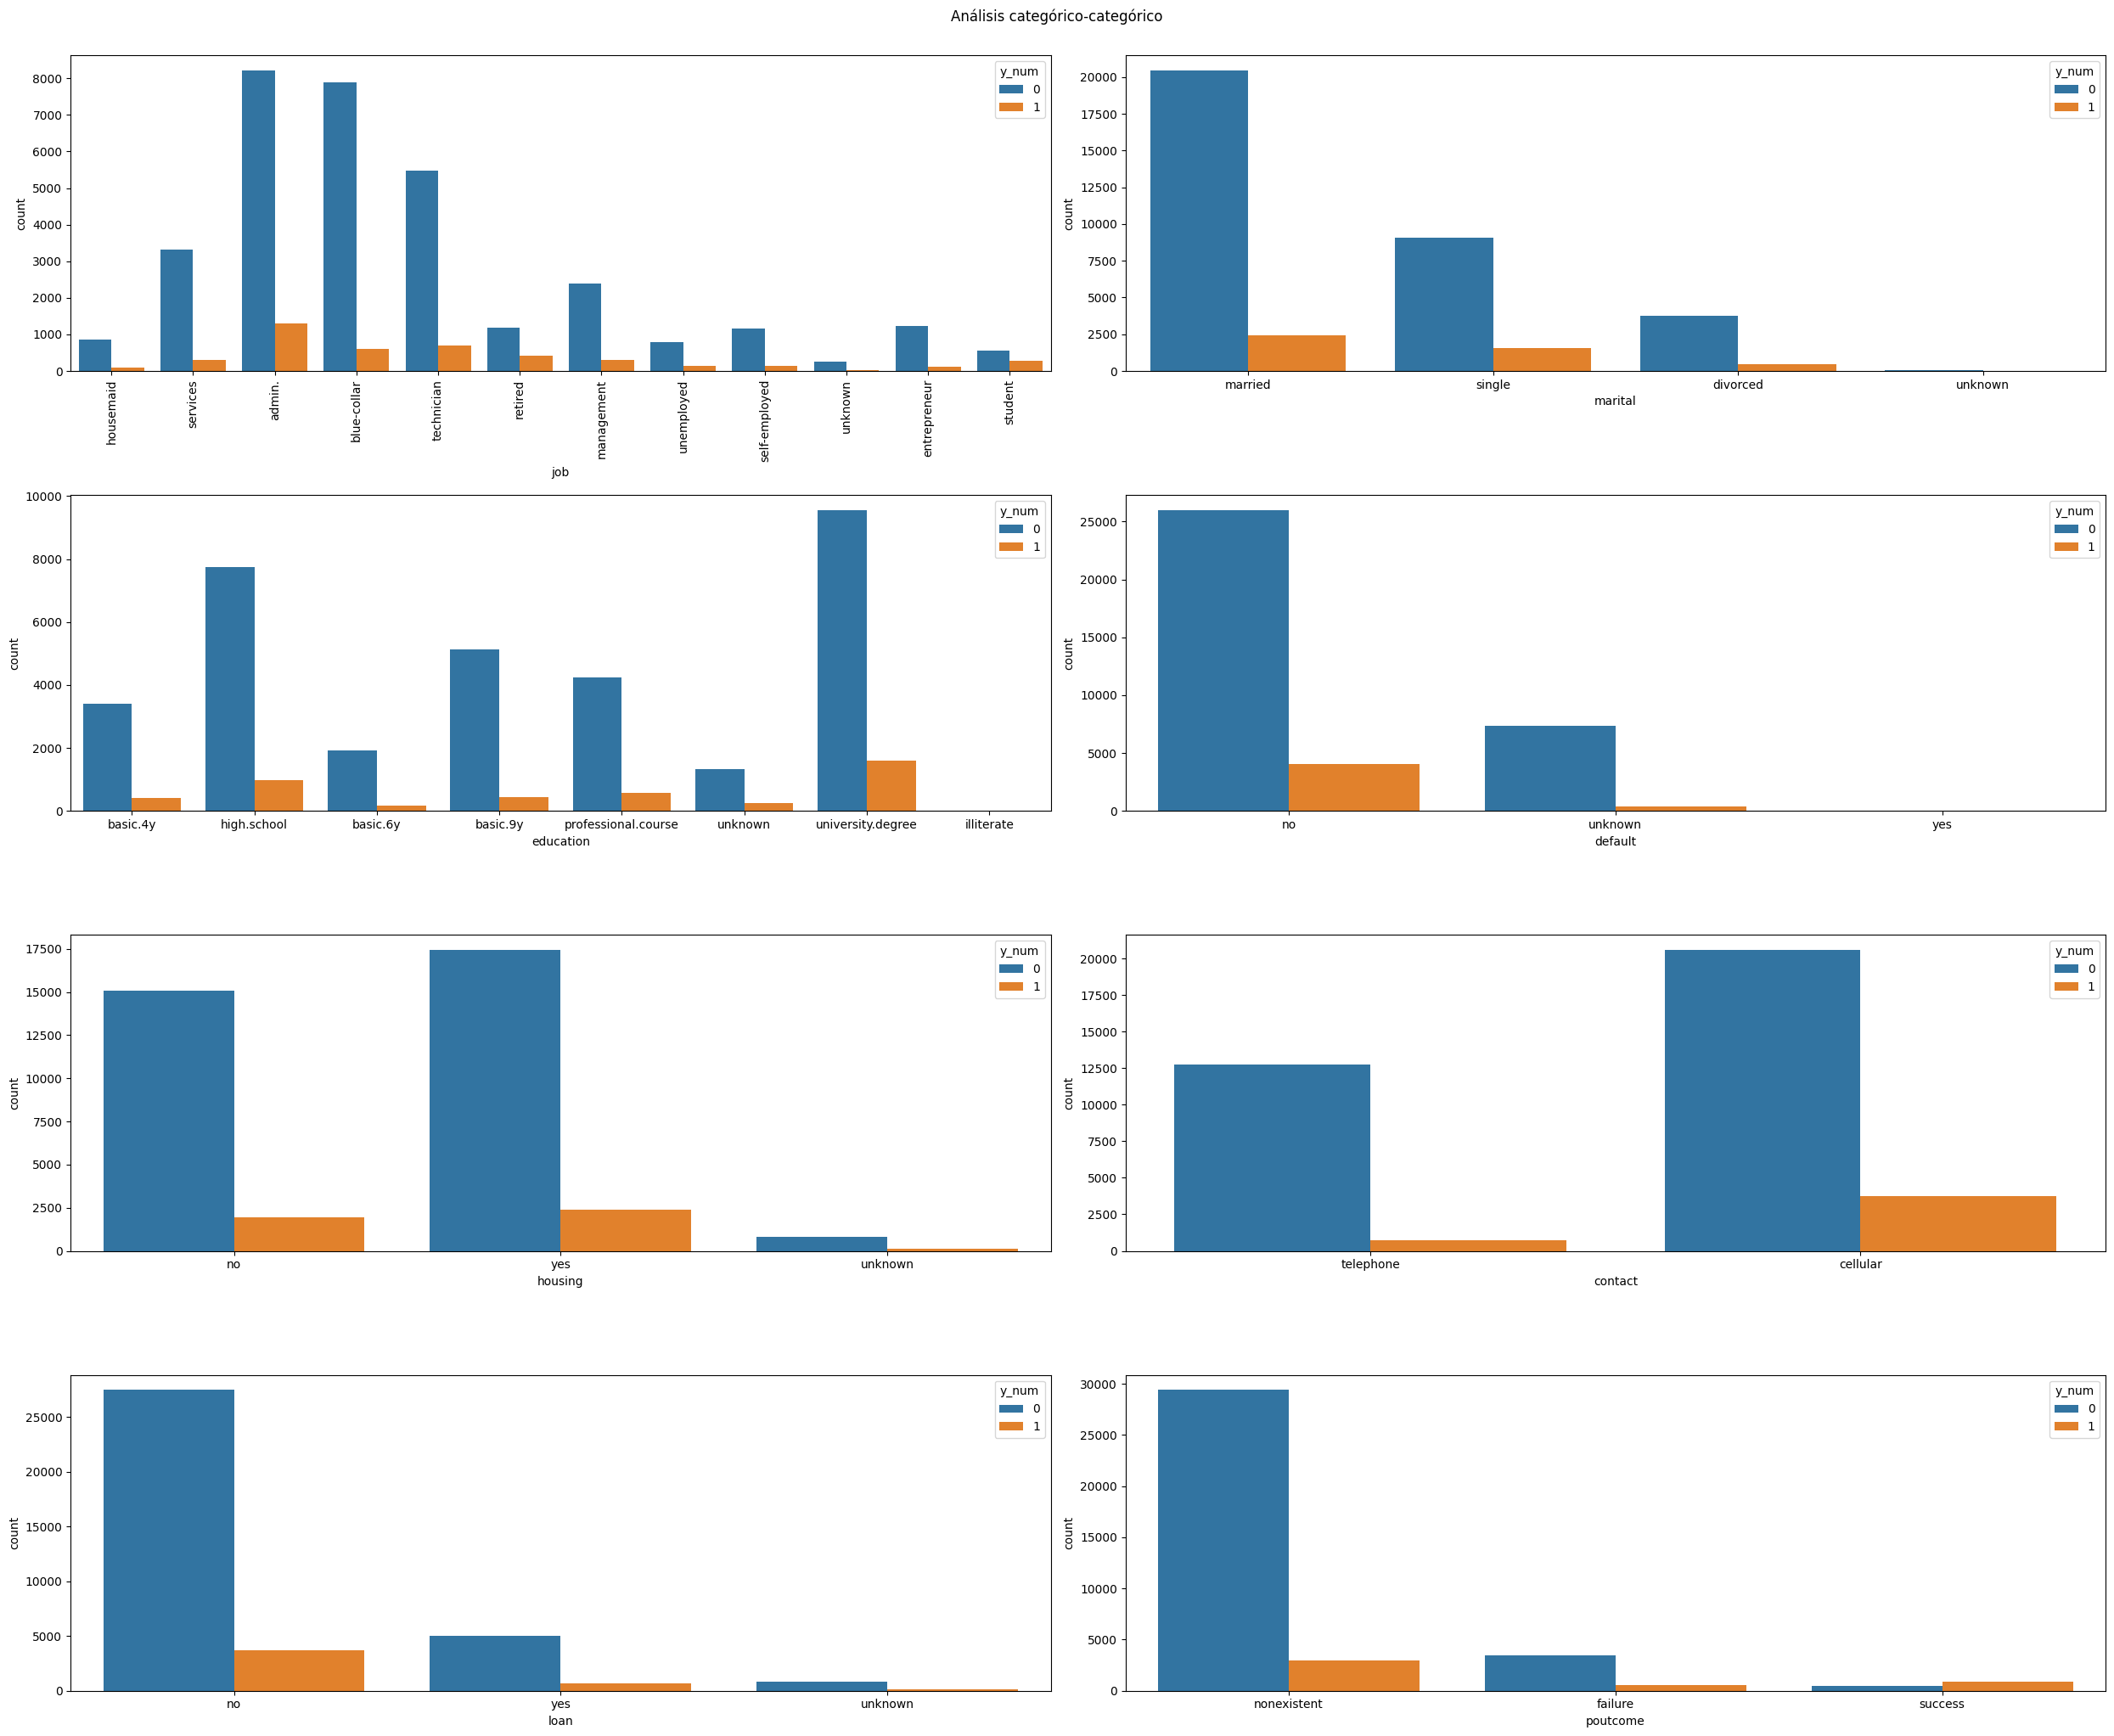

In [88]:
fig, axis = plt.subplots(4, 2, figsize = (25, 20))

sns.countplot(ax = axis[0, 0], data = df, x = "job", hue = "y_num")
axis[0,0].tick_params(axis = 'x', rotation = 90)
sns.countplot(ax = axis[0, 1], data = df, x = "marital", hue = "y_num")
sns.countplot(ax = axis[1, 0], data = df, x = "education", hue = "y_num")
sns.countplot(ax = axis[1, 1], data = df, x = "default", hue = "y_num")
sns.countplot(ax = axis[2, 0], data = df, x = "housing", hue = "y_num")
sns.countplot(ax = axis[2, 1], data = df, x= 'contact', hue = "y_num")
sns.countplot(ax = axis[3, 0], data = df, x= 'loan', hue = "y_num")
sns.countplot(ax = axis[3, 1], data = df, x= 'poutcome', hue = "y_num")


plt.tight_layout()
fig.suptitle('Análisis categórico-categórico', y = 1.02)
plt.show()

### Transformación de las variables categóricas en numericas

Job

In [47]:
import category_encoders as ce 
encoder = ce.TargetEncoder(cols= 'job')
#Fit y transformar la variabnle job
df['job_encoded'] = encoder.fit_transform(df['job'], df['y_num'])

In [48]:
df.drop('job', axis = 1, inplace= True)

Eduacation

In [49]:
education_order = [
    "illiterate",           # 0
    "unknown",              # 1
    "basic.4y",             # 2
    "basic.6y",             # 3
    "basic.9y",             # 4
    "professional.course",  # 5
    "high.school",          # 6
    "university.degree"     # 7
]

orden_dict = {valor: idx for idx, valor in enumerate(education_order)}

df['education_encoded'] = df['education'].map(orden_dict)

In [50]:
print(df[['education', 'education_encoded']].value_counts())

education            education_encoded
university.degree    7                    11157
high.school          6                     8728
basic.9y             4                     5589
professional.course  5                     4803
basic.4y             2                     3816
basic.6y             3                     2101
unknown              1                     1580
illiterate           0                       17
Name: count, dtype: int64


In [51]:
df.drop('education', axis= 1, inplace= True)
df.head()

,age,marital,default,housing,loan,contact,campaign,poutcome,emp.var.rate,cons.conf.idx,euribor3m,y_num,job_encoded,education_encoded
0,56,married,no,no,no,telephone,1,nonexistent,1.1,-36.4,4.857,0,0.107404,2
1,57,married,unknown,no,no,telephone,1,nonexistent,1.1,-36.4,4.857,0,0.083999,6
2,37,married,no,yes,no,telephone,1,nonexistent,1.1,-36.4,4.857,0,0.083999,6
3,40,married,no,no,no,telephone,1,nonexistent,1.1,-36.4,4.857,0,0.136268,3
4,56,married,no,no,yes,telephone,1,nonexistent,1.1,-36.4,4.857,0,0.083999,6


Contact

In [52]:
# Lista de columnas a transformar
columnas_cat = df.select_dtypes(include=['object']).columns.tolist()

# Crear una instancia de LabelEncoder
le = LabelEncoder()

# Iterar sobre las columnas y aplicar LabelEncoder
for col in columnas_cat:
    df[col + '_encoded'] = le.fit_transform(df[col])

In [53]:
df.drop(columnas_cat, axis= 1, inplace=True)
df.head()

,age,campaign,emp.var.rate,cons.conf.idx,euribor3m,y_num,job_encoded,education_encoded,marital_encoded,default_encoded,housing_encoded,loan_encoded,contact_encoded,poutcome_encoded
0,56,1,1.1,-36.4,4.857,0,0.107404,2,1,0,0,0,1,1
1,57,1,1.1,-36.4,4.857,0,0.083999,6,1,1,0,0,1,1
2,37,1,1.1,-36.4,4.857,0,0.083999,6,1,0,2,0,1,1
3,40,1,1.1,-36.4,4.857,0,0.136268,3,1,0,0,0,1,1
4,56,1,1.1,-36.4,4.857,0,0.083999,6,1,0,0,2,1,1


In [58]:
df.shape

(37791, 13)

In [83]:
df.dtypes

age                    int64
campaign               int64
cons.conf.idx        float64
euribor3m            float64
y_num                  int64
job_encoded          float64
education_encoded      int64
marital_encoded        int64
default_encoded        int64
housing_encoded        int64
loan_encoded           int64
contact_encoded        int64
poutcome_encoded       int64
dtype: object

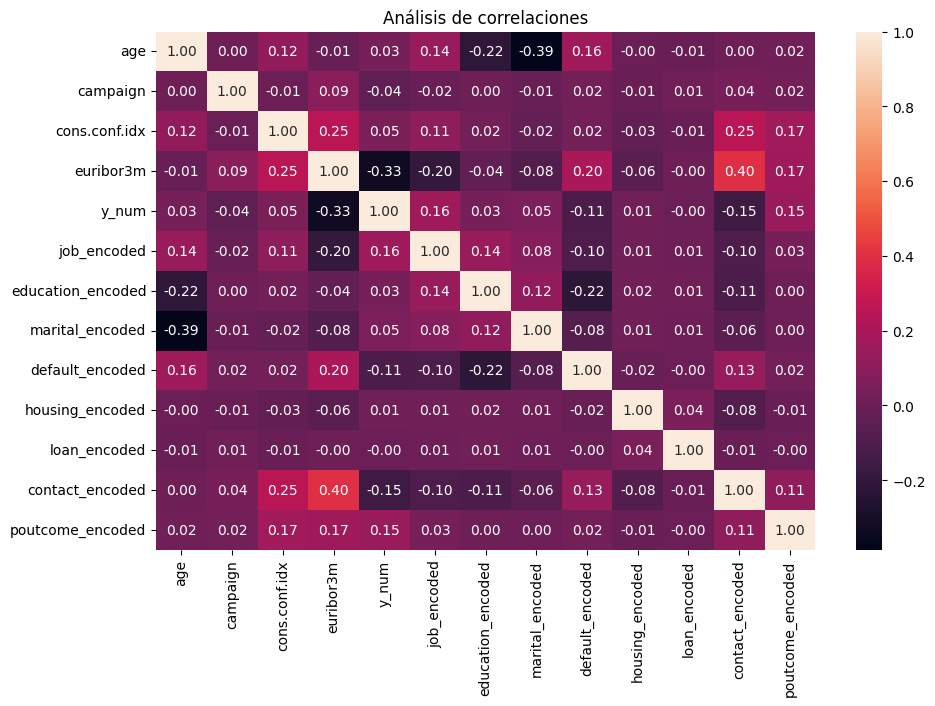

In [84]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(df.corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.title('Análisis de correlaciones')

plt.show()

In [85]:
X = df.drop(['y_num'], axis=1)
y = df.y_num

# Ajusta el modelo
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Instancia de la influencia y obtención de la distancia de cook para cada observación
cooks_distance = model.get_influence().cooks_distance
cooks_distance

(array([1.47600104e-06, 4.76218453e-07, 3.51567993e-07, ...,
        5.02489502e-05, 1.62357605e-04, 1.84836308e-05]),
 array([1., 1., 1., ..., 1., 1., 1.]))

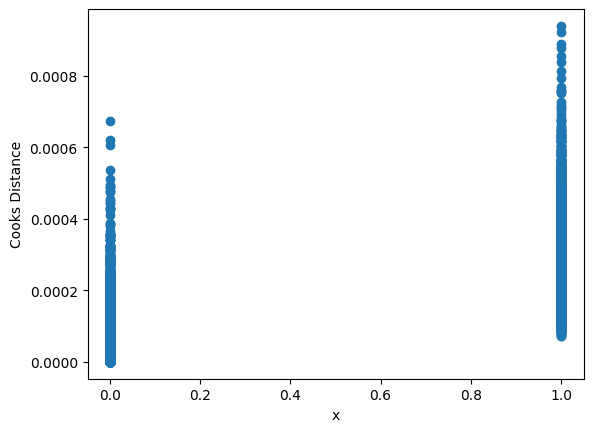

In [86]:
plt.scatter(df.y_num, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [87]:
pto_corte = 4/len(X)
print(round(pto_corte,5))

0.00012


In [88]:
#Para observar el % de mis observaciones que superan el punto de corte y por lo tanto van a ser eliminadas
len(np.where(cooks_distance[0]>pto_corte)[0])/len(X)*100

12.057643737928986

In [89]:
# Verifica los índices que estás intentando eliminar
indices_a_eliminar = np.where(cooks_distance[0] > pto_corte)[0]
indices_existentes = df.index.intersection(indices_a_eliminar)

print(f"Índices a eliminar que no existen en ds: {set(indices_a_eliminar) - set(indices_existentes)}") #devuelve los elementos que están en indices_a_eliminar pero no en indices_existentes


Índices a eliminar que no existen en ds: {np.int64(32769), np.int64(16388), np.int64(14348), np.int64(32783), np.int64(30738), np.int64(32793), np.int64(32794), np.int64(24603), np.int64(30745), np.int64(30749), np.int64(32799), np.int64(26657), np.int64(14374), np.int64(32815), np.int64(32817), np.int64(10289), np.int64(16435), np.int64(22580), np.int64(30772), np.int64(30780), np.int64(30781), np.int64(14399), np.int64(14402), np.int64(32841), np.int64(32846), np.int64(30799), np.int64(32852), np.int64(32854), np.int64(32859), np.int64(32864), np.int64(26720), np.int64(32870), np.int64(12392), np.int64(28777), np.int64(30824), np.int64(30829), np.int64(4214), np.int64(26748), np.int64(14468), np.int64(32901), np.int64(30858), np.int64(32911), np.int64(16528), np.int64(32918), np.int64(32938), np.int64(30900), np.int64(32958), np.int64(22718), np.int64(10433), np.int64(8386), np.int64(10435), np.int64(32972), np.int64(32973), np.int64(32978), np.int64(10458), np.int64(10465), np.int64

In [90]:
len(indices_a_eliminar)

4058

In [91]:
indices_a_eliminar_validos = df.index.intersection(indices_a_eliminar) #Obtengo los índices que deseo eliminar (indices_a_eliminar) pero que realmente existen en el dataset.
df.drop(indices_a_eliminar_validos, inplace=True)

In [92]:
df.shape

(30285, 13)

In [93]:
X = df.drop(['y_num'], axis=1)
y = df.y_num

In [94]:
# Defino las variables de entrenamiento y de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [95]:
# Usamos xgb para conocer la importancia de las características
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100}) #Aquí se crea el nuevo df con dos columnas, una con las variables y otra con su R**2 sobre el modelo
df_imp = df_imp.sort_values(by='Importance', ascending=False) #ordeno de más importancia a menos
df_imp

,Feature,Importance
3,euribor3m,25.029322
11,poutcome_encoded,19.203884
2,cons.conf.idx,7.660926
10,contact_encoded,7.539936
4,job_encoded,5.801861
6,marital_encoded,5.768200
7,default_encoded,5.431555
9,loan_encoded,4.887968
8,housing_encoded,4.795455
0,age,4.670753


In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(round(vif_data, 3))

              feature     VIF
0                 age  15.797
1            campaign   4.022
2       cons.conf.idx  29.084
3           euribor3m   7.357
4         job_encoded   7.084
5   education_encoded   8.731
6     marital_encoded   5.272
7     default_encoded   1.429
8     housing_encoded   2.169
9        loan_encoded   1.206
10    contact_encoded   2.005
11   poutcome_encoded   8.181


In [97]:
X_train.drop('cons.conf.idx', axis=1, inplace= True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(round(vif_data, 3))

              feature     VIF
0                 age  11.206
1            campaign   3.898
2           euribor3m   7.101
3         job_encoded   7.064
4   education_encoded   7.701
5     marital_encoded   4.516
6     default_encoded   1.428
7     housing_encoded   2.133
8        loan_encoded   1.204
9     contact_encoded   1.997
10   poutcome_encoded   7.957


In [100]:
X_test.drop('cons.conf.idx', axis=1, inplace= True)

In [101]:
#Antes quitamos la columna binaria "es_nuevo"
binary_cols = X_train[(X_train==0)|(X_train==1)].dropna(axis=1).columns.values
binary_cols

array(['contact_encoded'], dtype=object)

In [102]:
#Creo dos nuevos dataframes que solo contienen los datos numéricos y son los que voy a escalar.
X_train_num = X_train.drop(binary_cols, axis=1)
X_test_num = X_test.drop(binary_cols, axis=1)

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train_num)
X_train_num_sc = scaler.transform(X_train_num)
X_test_num_sc = scaler.transform(X_test_num)

In [104]:
#Volvemos a unir los dataframes de numericos (ahora scalados entre 0-1) y los datos binarios
X_train_sc_df = pd.concat([pd.DataFrame(X_train_num_sc, columns= X_train_num.columns), X_train[binary_cols].reset_index(drop = True)], axis= 1)
X_test_sc_df = pd.concat([pd.DataFrame(X_test_num_sc, columns= X_test_num.columns), X_test[binary_cols].reset_index(drop = True)], axis= 1)

In [105]:
X_train_sc_df.shape

(24228, 11)

In [106]:
X_train_sc_df

,age,campaign,euribor3m,job_encoded,education_encoded,marital_encoded,default_encoded,housing_encoded,loan_encoded,poutcome_encoded,contact_encoded
0,0.320988,0.00,0.185672,0.000000,0.571429,0.333333,0.5,0.0,0.0,0.0,0
1,0.197531,0.50,0.980730,0.251698,0.857143,0.333333,0.0,0.0,0.0,0.5,1
2,0.629630,0.25,0.024484,0.737452,0.285714,0.333333,0.0,1.0,0.0,0.0,0
3,0.370370,0.00,0.981183,0.000000,0.571429,0.000000,0.0,1.0,0.0,0.5,0
4,0.185185,0.00,0.174790,0.171968,1.000000,0.666667,0.0,1.0,0.0,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
24223,0.148148,0.50,0.055543,0.162775,0.714286,0.666667,0.0,0.0,0.0,0.0,0
24224,0.444444,0.00,0.957379,0.144171,1.000000,0.333333,0.0,0.0,1.0,0.5,1
24225,0.234568,0.00,0.957153,0.162775,0.714286,0.333333,0.0,0.0,0.0,0.5,1
24226,0.308642,0.25,0.982317,0.162775,0.714286,0.333333,0.0,1.0,0.0,0.5,0


In [107]:
from sklearn.feature_selection import f_regression, SelectKBest  

selection_model = SelectKBest(f_regression, k = 6) #Selecciono las 6 mejores variables
selection_model.fit(X_train_sc_df, y_train) #El modelo de selección se ajusta a los datos de entrenamiento

# get_support() --> devuelve una máscara booleana (True o False) que indica qué características han sido seleccionadas. 
#En este caso, ix será un array de valores booleanos con True en las posiciones correspondientes a las características seleccionadas.
ix = selection_model.get_support()

#transform() --> aplica la selección de características a X_train y X_test, reduciendo estos conjuntos de datos solo a las 6 mejores características seleccionadas.
X_train_sel = pd.DataFrame(selection_model.transform(X_train_sc_df), columns = X_train_sc_df.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_sc_df), columns = X_test_sc_df.columns.values[ix])

X_train_sel.head()

,campaign,euribor3m,job_encoded,default_encoded,poutcome_encoded,contact_encoded
0,0.00,0.185672,0.000000,0.5,0.0,0.0
1,0.50,0.980730,0.251698,0.0,0.5,1.0
2,0.25,0.024484,0.737452,0.0,0.0,0.0
3,0.00,0.981183,0.000000,0.0,0.5,0.0
4,0.00,0.174790,0.171968,0.0,0.5,0.0


In [110]:
X_train_sel["y_num"] = list(y_train)
X_test_sel["y_num"] = list(y_test)
X_train_sel.to_csv("../data/processed/Bank_clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/Bank_clean_test.csv", index = False)

## **Modelo de regresión logística**

In [111]:
train_data = pd.read_csv("../data/processed/Bank_clean_train.csv")
test_data = pd.read_csv("../data/processed/Bank_clean_test.csv")

train_data.head()

,campaign,euribor3m,job_encoded,default_encoded,poutcome_encoded,contact_encoded,y_num
0,0.00,0.185672,0.000000,0.5,0.0,0.0,1
1,0.50,0.980730,0.251698,0.0,0.5,1.0,0
2,0.25,0.024484,0.737452,0.0,0.0,0.0,0
3,0.00,0.981183,0.000000,0.0,0.5,0.0,0
4,0.00,0.174790,0.171968,0.0,0.5,0.0,1


In [113]:
X_train = train_data.drop(["y_num"], axis = 1)
y_train = train_data["y_num"]
X_test = test_data.drop(["y_num"], axis = 1)
y_test = test_data["y_num"]

In [114]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [115]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [116]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8956579164602939

### Optimización del modelo

1. Búsqueda en cuadrícula

In [117]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [118]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.001, 'penalty': None, 'solver': 'lbfgs'}


In [119]:
model = LogisticRegression(C = 0.001, penalty = None,  solver = "lbfgs")
model.fit(X_train, y_train)

LogisticRegression(C=0.001, penalty=None)

In [120]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [121]:
accuracy_score(y_test, y_pred)

0.8956579164602939

Nos encontramos en un máximo local